In [92]:
from astropy import constants as const
from scipy.stats import stats
import scipy.integrate as integrate
from scipy.stats import norm
from scipy import interpolate
from astropy.io import fits
from astropy import units as u
from iminuit import Minuit
from scipy.optimize import curve_fit
from iminuit.cost import LeastSquares
import numpy as np
import pysynphot as S
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [93]:
%%time

NBBANDS=6
band_to_number={'u':0,'g':1,'r':2,'i':3,'z':4,'y4':5}
band_to_number_2={'u':0,'g':1,'r':2,'i':3,'z':4,'y':5}
number_to_band={0:'u',1:'g',2:'r',3:'i',4:'z',5:'y4'}
filtercolor=['blue','green','red','orange','grey','black']
NBCOLORS=NBBANDS-1
number_to_color={0:'U-G',1:'G-R',2:'R-I',3:'I-Z',4:'Z-Y'}
color_to_number={'U-G':0,'G-R':1,'R-I':2,'I-Z':3,'Z-Y':4}
mpl_colors_col=['b','g','r','y','k']

WLMIN=3000. # Minimum wavelength : PySynPhot works with Angstrom
WLMAX=11000. # Minimum wavelength : PySynPhot works with Angstrom

NBINS=int(WLMAX-WLMIN) # Number of bins between WLMIN and WLMAX
BinWidth=(WLMAX-WLMIN)/float(NBINS) # Bin width in Angstrom
WL=np.linspace(WLMIN,WLMAX,NBINS)   # Array of wavelength in Angstrom

# LSST collectif surface
Deff=642.3 # effective radius in cm
Seff = np.pi*Deff**2/4  # in cm2
S.refs.setref(area=Seff, waveset=None) # set by default to 6.4230 m2
S.refs.set_default_waveset(minwave=WLMIN, maxwave=WLMAX, num=NBINS, delta=BinWidth, log=False)
S.refs.showref()

EXPOSURE=30.0    

graphtable: D:\PYSYN_CDBS\grp\redcat\trds\mtab\4cm1612bm_tmg.fits
 comptable: D:\PYSYN_CDBS\grp\redcat\trds\mtab\5182153pm_tmc.fits
thermtable: D:\PYSYN_CDBS\grp\redcat\trds\mtab\3241637sm_tmt.fits
      area: 324015.4546769212
   waveset: Min: 3000.0, Max: 11000.0, Num: None, Delta: 1.0, Log: False
Wall time: 998 µs


# Cadence LMC baseline v1

In [3]:
df = pd.read_csv("Downloads\Cadences dobservation des nuages de Magellan/cadence_lmc_baseline_v1.csv", index_col=0)
df

,observationId,night,observationStartMJD,fiveSigmaDepth,filter,airmass,skyBrightness,seeingFwhmEff,fieldId,fieldRA,fieldDec
0,934,1,59854.385463,21.593537,y,1.240813,18.077206,1.283730,-1,81.586959,-66.516554
1,936,1,59854.386287,21.510902,y,1.289795,17.976992,1.313900,-1,82.257779,-69.379108
2,937,1,59854.386702,21.432884,y,1.346227,17.894386,1.348096,-1,83.188050,-72.229967
3,3045,4,59857.362131,22.986090,z,1.382600,19.148145,0.881487,-1,80.811831,-73.766990
4,3103,4,59857.386839,22.764444,z,1.237434,18.602993,0.854189,-1,82.308664,-66.330677
...,...,...,...,...,...,...,...,...,...,...,...
891,2060333,3447,63269.058829,23.475867,u,1.278024,22.608174,1.180799,-1,85.471063,-68.743581
892,2060366,3447,63269.074276,24.549840,g,1.394360,22.091690,1.028710,-1,83.849276,-74.182487
893,2060368,3447,63269.075104,24.647890,g,1.282391,22.138014,0.978318,-1,85.471063,-68.743581
894,2062061,3449,63271.110220,23.578175,u,1.275128,22.621678,1.079728,-1,84.404241,-65.817402


# Histograms

Text(0.5, 0, 'skyBrightness')

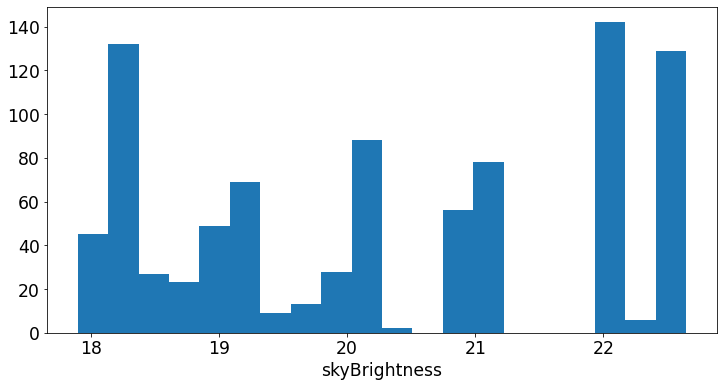

In [4]:
plt.hist(df['skyBrightness'], bins = 20);
plt.xlabel("skyBrightness")

Text(0.5, 0, 'fieldId')

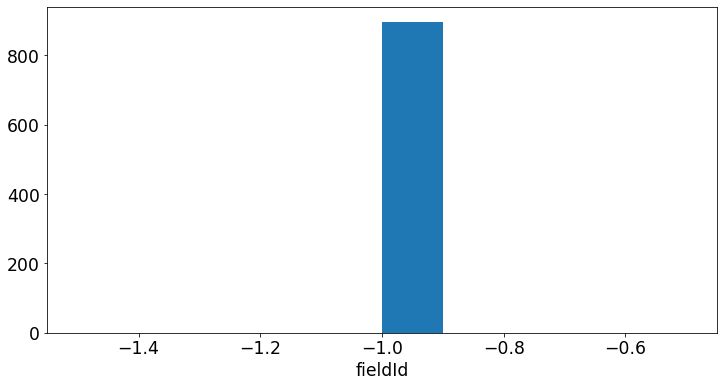

In [5]:
plt.hist(df["fieldId"]);
plt.xlabel("fieldId")

Text(0.5, 0, 'airmass')

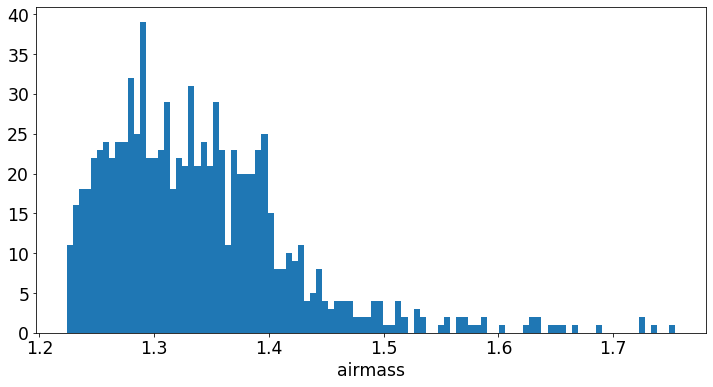

In [6]:
plt.hist(df["airmass"], bins = 100);
plt.xlabel("airmass")

Text(0.5, 0, 'fiveSigmaDepth')

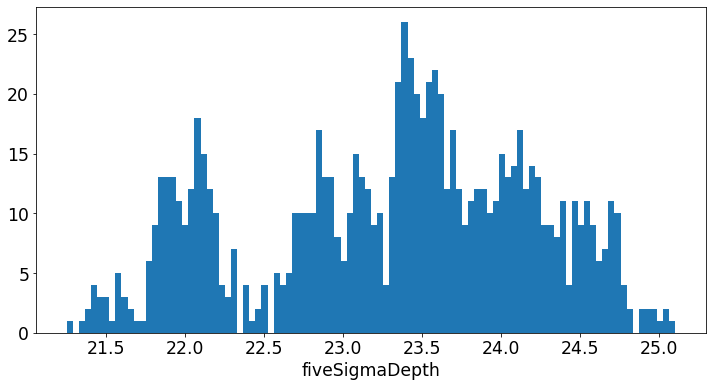

In [7]:
plt.hist(df["fiveSigmaDepth"], bins = 100);
plt.xlabel("fiveSigmaDepth")

# t0 distribution

Wall time: 2 s


Text(0.5, 1.0, 'Distribution des $t_0$')

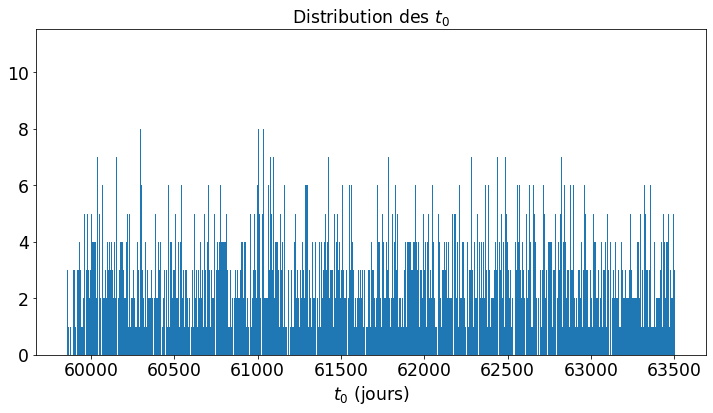

In [8]:
%%time

from scipy.stats import uniform

NYEARS = 10
NDAYS = NYEARS*365.25

xmin = 0
xmax = NDAYS
N=10000 # le nombre de simulation peut être artibrairement tres grand. Ce qui compte c'est de calculer l'efficacité de detection de la courbe de lumière
list_t0 = uniform.rvs(xmin,xmax,N) + df['observationStartMJD'][0]

plt.hist(list_t0,bins=int(NDAYS));
plt.xlabel("$t_0$ (jours)")
plt.title("Distribution des $t_0$")

# u0 distribution

In [ ]:
N = 1000
uminmin = 0
uminmax = 2
umin = uniform.rvs(uminmin,uminmax,N)

plt.hist(umin,bins=100)
plt.xlabel("$u_{min}$")
plt.ylabel("$p(u_{min})$")
plt.title("$u_{min}$ distribution")

# Define LMC coordinates

In [10]:
import astroquery
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad

In [11]:
result_table = Simbad.query_object("lmc")

In [12]:
galaxy_coord = SkyCoord(ra=result_table["RA"][0]+"hour",dec=result_table["DEC"][0]+ "degrees")
galaxy_ra = galaxy_coord.ra.deg
galaxy_dec = galaxy_coord.dec.deg
print(galaxy_ra,galaxy_dec)

80.89416666666666 -69.75611111111111


### 

 - We only keep data points in a 3.5° field around the center of the LMC

In [13]:
from photutils.aperture import SkyCircularAperture
from regions import CircleSkyRegion

positions = SkyCoord(galaxy_ra, galaxy_dec, unit = 'deg').galactic
aper = SkyCircularAperture(positions, 3.5 * u.deg)
Circle = CircleSkyRegion(positions, 3.5 * u.deg)

In [14]:
data_coords = []
data_coords_u = []
data_coords_g = []
data_coords_r = []
data_coords_i = []
data_coords_z = []
data_coords_y = []
gal_u = []
gal_g = []
gal_r = []
gal_i = []
gal_z = []
gal_y = []

for i in range (len(df['observationStartMJD'])) :
    
    data_coords.append(SkyCoord(ra = df['fieldRA'].values[i], dec = df['fieldDec'].values[i], unit = 'deg'))
    
    if (df["filter"][i] == "u") :
        
        data_coords_u.append(SkyCoord(ra = df['fieldRA'].values[i], dec = df['fieldDec'].values[i], unit = 'deg'))
        gal_u.append(data_coords[i].galactic)
   
    elif (df["filter"][i] == "g") :
        
        data_coords_g.append(SkyCoord(ra = df['fieldRA'].values[i], dec = df['fieldDec'].values[i], unit = 'deg'))
        gal_g.append(data_coords[i].galactic)
        
    elif (df["filter"][i] == "r") :
        
        data_coords_r.append(SkyCoord(ra = df['fieldRA'].values[i], dec = df['fieldDec'].values[i], unit = 'deg'))
        gal_r.append(data_coords[i].galactic)
        
    elif (df["filter"][i] == "i") :
        
        data_coords_i.append(SkyCoord(ra = df['fieldRA'].values[i], dec = df['fieldDec'].values[i], unit = 'deg'))
        gal_i.append(data_coords[i].galactic)
           
    elif (df["filter"][i] == "z") :
        
        data_coords_z.append(SkyCoord(ra = df['fieldRA'].values[i], dec = df['fieldDec'].values[i], unit = 'deg'))
        gal_z.append(data_coords[i].galactic)
        
    elif (df["filter"][i] == "y") :
        
        data_coords_y.append(SkyCoord(ra = df['fieldRA'].values[i], dec = df['fieldDec'].values[i], unit = 'deg'))
        gal_y.append(data_coords[i].galactic)
        

# Sky map of the data points in galactic coordinates 

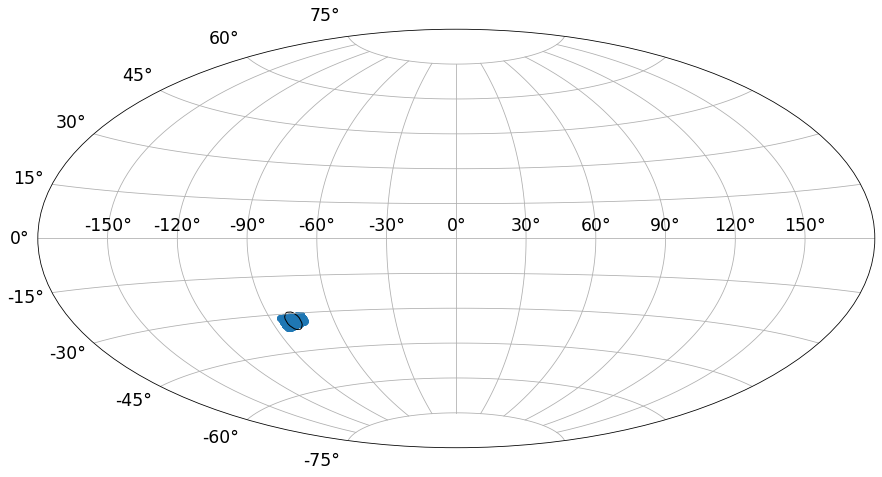

In [94]:
Circle_1 = plt.Circle((positions.l.wrap_at('180d').radian, positions.b.radian), 3.5*np.pi/180, fill = False)
gal = SkyCoord(df['fieldRA'], df['fieldDec'], unit='deg').galactic
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(projection='aitoff')
ax.add_patch(Circle_1)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, color='C0', alpha=1, marker='o')
plt.grid();

# Sky map of the data points in galactic coordinates (with colors for each filters)

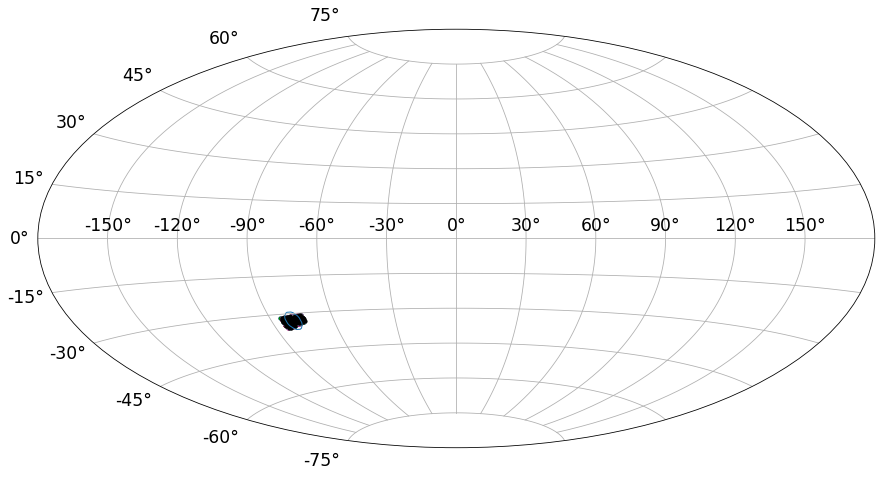

In [16]:
fig = plt.figure(figsize=(15, 10))
Circle_1 = plt.Circle((positions.l.wrap_at('180d').radian, positions.b.radian), 3.5*np.pi/180, fill = False, color ='C0')
ax = plt.subplot(projection='aitoff')
ax.add_patch(Circle_1)

for i in range (len(gal_u)) :

    plt.scatter(gal_u[i].l.wrap_at('180d').radian, gal_u[i].b.radian, color ='b', alpha=1, marker='.')
    
for i in range (len(gal_g)) :
    
    plt.scatter(gal_g[i].l.wrap_at('180d').radian, gal_g[i].b.radian, color = "g", alpha=1, marker='.')
    
for i in range (len(gal_r)) :
    
    plt.scatter(gal_r[i].l.wrap_at('180d').radian, gal_r[i].b.radian, color = "r", alpha=1, marker='.')
    
for i in range (len(gal_i)) :
    
    plt.scatter(gal_i[i].l.wrap_at('180d').radian, gal_i[i].b.radian, color = "blueviolet", alpha=1, marker='.')
    
for i in range (len(gal_z)) :
    
    plt.scatter(gal_z[i].l.wrap_at('180d').radian, gal_z[i].b.radian, color = "grey", alpha=1, marker='.')
    
for i in range (len(gal_y)) :
    
    plt.scatter(gal_y[i].l.wrap_at('180d').radian, gal_y[i].b.radian, color = "k", alpha=1, marker='.')

plt.grid();

In [17]:
from astropy.wcs import WCS

In [18]:
File = fits.open(r'D:\Projet de recherche\Stage\skv20135441655710.fits')

image = File[0].data
header = File[0].header
wcs = WCS(header)

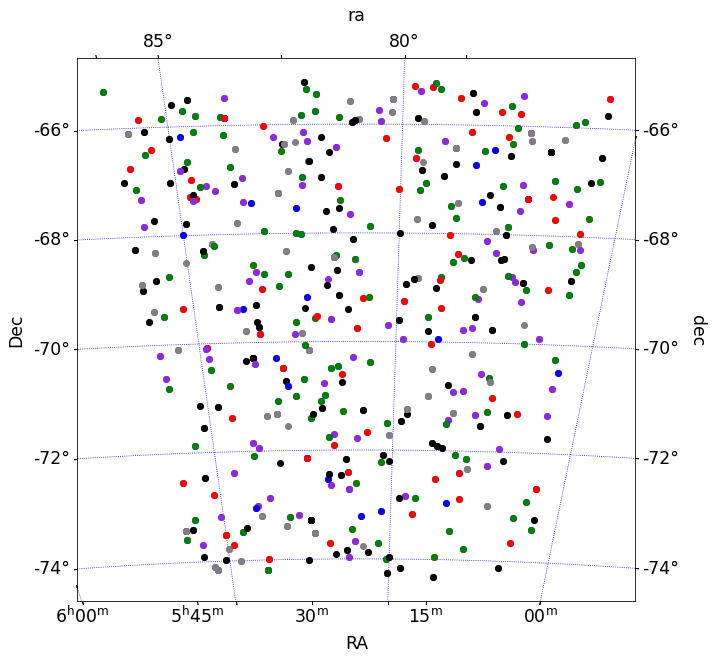

In [95]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection = wcs)
#plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')
#Circle_2 = plt.Circle((galaxy_ra, galaxy_dec), 3.5, fill = False, color ='C0')
#ax.add_patch(Circle_2)

for i in range (len(df['observationId'])) :

    if (df['filter'][i] == "u") :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='b', marker='o')
        
    if (df['filter'][i] == "g") :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='g', marker='o')
        
    if (df['filter'][i] == "r") :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='r', marker='o')
        
    if (df['filter'][i] == "i") :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='blueviolet', marker='o')
        
    if (df['filter'][i] == "z") :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='grey', marker='o')
        
    if (df['filter'][i] == "y") :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='k', marker='o')
    
#ax.plot_coord(SkyCoord(galaxy_ra * u.deg, galaxy_dec * u.deg), marker = 'o')   
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='blue', ls='dotted')

In [96]:
df_test = df[((df['fieldRA'] - galaxy_ra)**2 + (df['fieldDec'] - galaxy_dec)**2 < Circle.radius.value**2)]

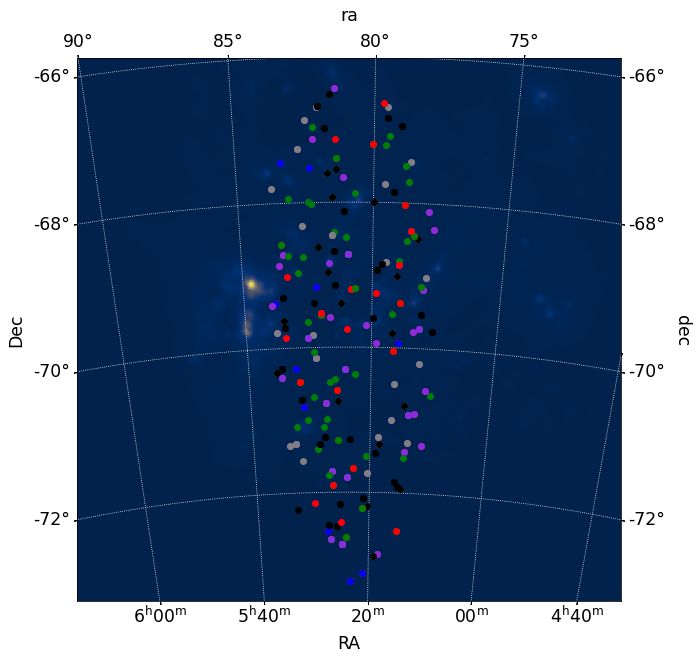

In [97]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection = wcs)
plt.imshow(image, origin='lower', cmap='cividis', aspect='equal')   
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')


for i in range (len(df['observationId'])) :

    if (df['filter'][i] == 'u' and (df['fieldRA'][i] - galaxy_ra)**2 + (df['fieldDec'][i] - galaxy_dec)**2 < Circle.radius.value**2) :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='b', marker='o')
        
    if (df['filter'][i] == 'g' and (df['fieldRA'][i] - galaxy_ra)**2 + (df['fieldDec'][i] - galaxy_dec)**2 < Circle.radius.value**2) :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='g', marker='o')
        
    if (df['filter'][i] == 'r' and (df['fieldRA'][i] - galaxy_ra)**2 + (df['fieldDec'][i] - galaxy_dec)**2 < Circle.radius.value**2) :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='r', marker='o')
        
    if (df['filter'][i] == 'i' and (df['fieldRA'][i] - galaxy_ra)**2 + (df['fieldDec'][i] - galaxy_dec)**2 < Circle.radius.value**2) :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='blueviolet', marker='o')
        
    if (df['filter'][i] == 'z' and (df['fieldRA'][i] - galaxy_ra)**2 + (df['fieldDec'][i] - galaxy_dec)**2 < Circle.radius.value**2) :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='grey', marker='o')
        
    if (df['filter'][i] == 'y' and (df['fieldRA'][i] - galaxy_ra)**2 + (df['fieldDec'][i] - galaxy_dec)**2 < Circle.radius.value**2) :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='k', marker='o')
        
# 7.5° image

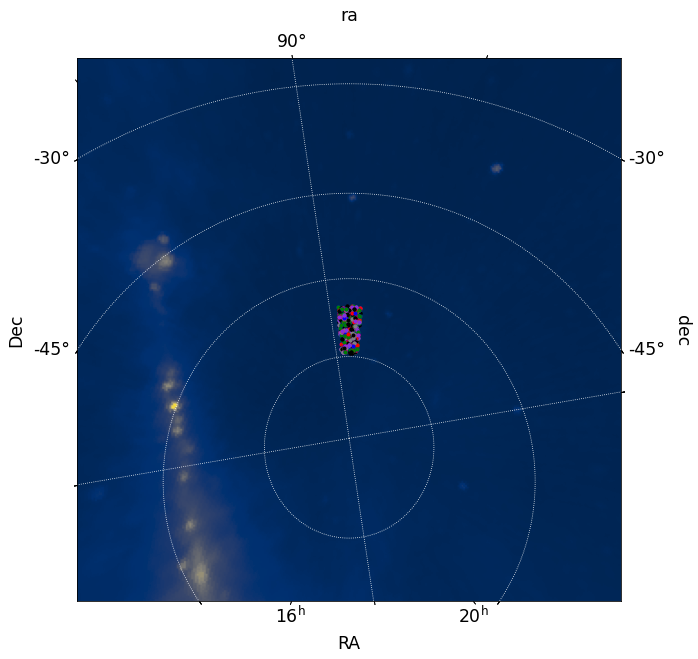

In [98]:
File_big = fits.open(r'D:\Projet de recherche\Stage\skv20134946561546.fits')

image_big = File_big[0].data
header_big = File_big[0].header
wcs_big = WCS(header_big)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection = wcs_big)
plt.imshow(image_big, origin='lower', cmap='cividis', aspect='equal')   
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')


for i in range (len(df['observationId'])) :

    if (df['filter'][i] == 'u' ):
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='b', marker='.')
        
    if (df['filter'][i] == 'g'  ):
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='g', marker='.')
        
    if (df['filter'][i] == 'r'  ):
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='r', marker='.')
        
    if (df['filter'][i] == 'i'  ):
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='blueviolet', marker='.')
        
    if (df['filter'][i] == 'z' ) :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='grey', marker='.')
        
    if (df['filter'][i] == 'y')  :
        
        ax.plot_coord(SkyCoord(df['fieldRA'][i] * u.deg, df['fieldDec'][i] * u.deg), color ='k', marker='.')

# Plot of the data points coordinates (RA, Dec) and the LSST field of view ( 3.5° circle around the center of the LMC)

Text(0, 0.5, 'Declination')

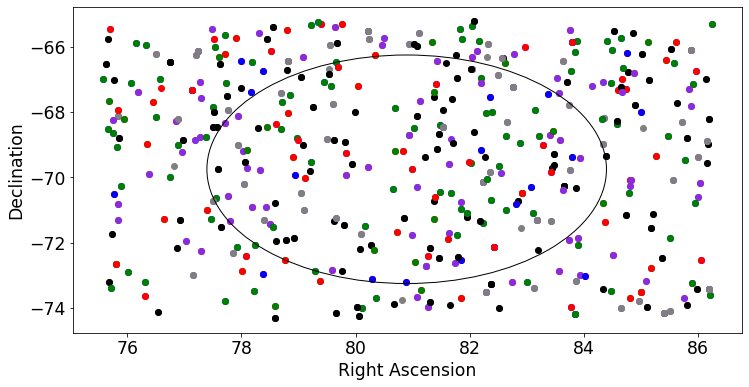

In [23]:
Circle_3 = plt.Circle((galaxy_ra, galaxy_dec), 3.5, fill = False)
fig, ax = plt.subplots() 

for i in range (len(df['observationStartMJD'])) :
    
    if (df["filter"][i] == "u") :
        
        plt.scatter(df["fieldRA"][i], df['fieldDec'][i], color = 'b', marker = 'o')
   
    elif (df["filter"][i] == "g") :
        
        plt.scatter(df["fieldRA"][i], df['fieldDec'][i], color = 'g', marker = 'o')
        
    elif (df["filter"][i] == "r") :
        
        plt.scatter(df["fieldRA"][i], df['fieldDec'][i], color = 'r', marker = 'o')
        
    elif (df["filter"][i] == "i") :
        
        plt.scatter(df["fieldRA"][i], df['fieldDec'][i], color = 'blueviolet', marker = 'o')
           
    elif (df["filter"][i] == "z") :
        
        plt.scatter(df["fieldRA"][i], df['fieldDec'][i], color = 'grey', marker = 'o')
        
    elif (df["filter"][i] == "y") :
        
        plt.scatter(df["fieldRA"][i], df['fieldDec'][i], color = 'k', marker = 'o')
        


ax.add_patch(Circle_3)
plt.xlabel("Right Ascension")
plt.ylabel("Declination")

# We only keep the data points inside the LSST field of view  

Text(0, 0.5, 'Declination')

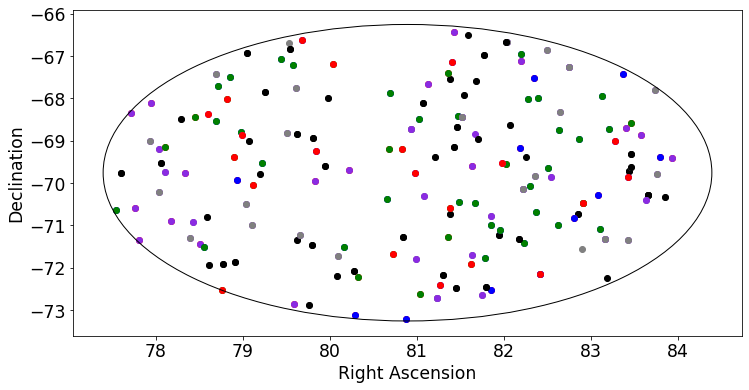

In [24]:
Circle_3 = plt.Circle((galaxy_ra, galaxy_dec), 3.5, fill = False)
fig, ax = plt.subplots() 

for i in range (len(df_test['observationStartMJD'])) :
    
    if (df_test["filter"].values[i] == "u") :
        
        plt.scatter(df_test["fieldRA"].values[i], df_test['fieldDec'].values[i], color = 'b', marker = 'o')
   
    elif (df_test["filter"].values[i] == "g") :
        
        plt.scatter(df_test["fieldRA"].values[i], df_test['fieldDec'].values[i], color = 'g', marker = 'o')
        
    elif (df_test["filter"].values[i] == "r") :
        
        plt.scatter(df_test["fieldRA"].values[i], df_test['fieldDec'].values[i], color = 'r', marker = 'o')
        
    elif (df_test["filter"].values[i] == "i") :
        
        plt.scatter(df_test["fieldRA"].values[i], df_test['fieldDec'].values[i], color = 'blueviolet', marker = 'o')
           
    elif (df_test["filter"].values[i] == "z") :
        
        plt.scatter(df_test["fieldRA"].values[i], df_test['fieldDec'].values[i], color = 'grey', marker = 'o')
        
    elif (df_test["filter"].values[i] == "y") :
        
        plt.scatter(df_test["fieldRA"].values[i], df_test['fieldDec'].values[i], color = 'k', marker = 'o')
        
ax.add_patch(Circle_3)
plt.xlabel("Right Ascension")
plt.ylabel("Declination")

# Relative angular source-lens separation u(t)

$$ 
   u(t) = \sqrt{u_{0}^2 + (\frac{t-t_0}{t_E})^2)}
$$




In [25]:
def u(t):
    return np.sqrt(u0**2+ ((t-t0)/tE)**2)

# Amplitude as a function of u(t)

$$
    A(u) = \frac{u^2 + 2}{u\sqrt{u^2 + 4}}
$$

In [26]:
def A(u):
    return (u**2+2)/u/np.sqrt(u**2+4)

# Amplitude as a function of u0, t0, tE

$$
    A(t, u_0, t_0, t_E) = \frac{u_{0}^2 + (\frac{t-t_0}{t_E})^2) + 2}{\sqrt{u_{0}^2 + (\frac{t-t_0}{t_E})^2)} \sqrt{u_{0}^2 + (\frac{t-t_0}{t_E})^2) + 4}}
$$

In [27]:
def Ab(t, u0, t0, tE) :
    return ((np.sqrt(u0**2+ ((t-t0)/tE)**2))**2+2)/(np.sqrt(u0**2+ ((t-t0)/tE)**2))/np.sqrt((np.sqrt(u0**2+ ((t-t0)/tE)**2))**2+4) 

# Gaussian

$$
    y = \frac{A}{\sigma \sqrt{2\pi}} e^{\frac{-(x - \mu)^2}{2\sigma^2}}
$$

In [28]:
#Gaussian fit

def Gauss(x, A, mu ,sigma) :
    return A*np.exp(-(x-mu)**2/(2*sigma**2))/sigma/np.sqrt(2*np.pi)

# Linear 

$$
    y = \alpha x + \beta
$$


In [29]:
#Linear fit

def linear(x, alpha, beta) : 
    return alpha*x + beta

# Plotting the light curve and Microlensing fit with arbitrary errors

t0 = 61743.12237791623
tE = 20
u0 = 1.4491198533608793


(61643.12237791623, 61843.12237791623)

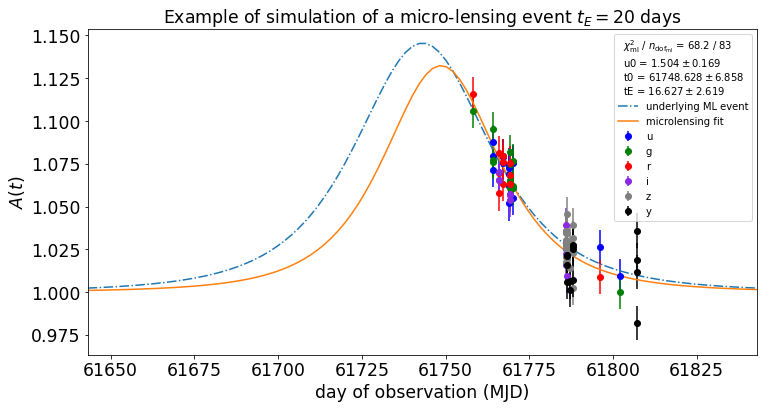

In [30]:
#Randomize parameters

from random import *

u0 = umin[randrange(len(umin))]
t0 = list_t0[randrange(len(list_t0))] 

#tE distribution or value

tE = 20

#Time t 

tmin=t0-5.*tE
tmax=t0+5.*tE
ti=np.linspace(tmin,tmax,100)


print("t0 = {}".format(t0)) #Display values
print("tE = {}".format(tE))
print("u0 = {}".format(u0))



#We distinguish data points by filter

df_event_u = df[(df["filter"] == "u") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax)] 
df_event_g = df[(df["filter"] == "g") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax)] 
df_event_r = df[(df["filter"] == "r") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax)] 
df_event_i = df[(df["filter"] == "i") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax)]  
df_event_z = df[(df["filter"] == "z") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax)]  
df_event_y = df[(df["filter"] == "y") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax)] 
df_event = df[(df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax)] 

df_event_times = df_event["observationStartMJD"].values
df_event_times_u = df_event_u["observationStartMJD"].values 
df_event_times_g = df_event_g["observationStartMJD"].values
df_event_times_r = df_event_r["observationStartMJD"].values
df_event_times_i = df_event_i["observationStartMJD"].values
df_event_times_z = df_event_z["observationStartMJD"].values
df_event_times_y = df_event_y["observationStartMJD"].values


#Plot

plt.plot(ti,A(u(ti)),"-.",label="underlying ML event")
#plt.scatter(df_event_times,A(u(df_event_times)),marker="o",s=20,color = "b",label="u")
#plt.scatter(df_event_u_times,A(u(df_event_u_times)),marker="o",s=20,color = "b",label="u")
#plt.scatter(df_event_g_times,A(u(df_event_g_times)),marker="o",s=20,color = "g",label="g")
#plt.scatter(df_event_r_times,A(u(df_event_r_times)),marker="o",s=20,color = "r",label="r")
#plt.scatter(df_event_i_times,A(u(df_event_i_times)),marker="o",s=20,color ="blueviolet",label="i")
#plt.scatter(df_event_z_times,A(u(df_event_z_times)),marker="o",s=20,color ="grey",label="z")
#plt.scatter(df_event_y_times,A(u(df_event_y_times)),marker="o",s=20,color="k",label="y")

# Microlensing fit with iMinuit

x = df_event_times       
x_u = df_event_times_u
x_g = df_event_times_g
x_r = df_event_times_r
x_i = df_event_times_i
x_z = df_event_times_z
x_y = df_event_times_y

y_data = A(u(df_event_times))

y_noise = 0.01

y = y_data + y_noise * np.random.randn(len(x))
y_u = A(u(df_event_times_u)) + y_noise * np.random.randn(len(x_u))
y_g = A(u(df_event_times_g)) + y_noise * np.random.randn(len(x_g))
y_r = A(u(df_event_times_r)) + y_noise * np.random.randn(len(x_r))
y_i = A(u(df_event_times_i)) + y_noise * np.random.randn(len(x_i)) 
y_z = A(u(df_event_times_z)) + y_noise * np.random.randn(len(x_z))
y_y = A(u(df_event_times_y)) + y_noise * np.random.randn(len(x_y))


plt.errorbar(x_u, y_u, y_noise, fmt="o", label="u", color = "b")  #Show data points with their respective photometric error
plt.errorbar(x_g, y_g, y_noise, fmt="o", label="g", color = "g")  #Color depends on the filter
plt.errorbar(x_r, y_r, y_noise, fmt="o", label="r", color = "r")
plt.errorbar(x_i, y_i, y_noise, fmt="o", label="i", color = "blueviolet")
plt.errorbar(x_z, y_z, y_noise, fmt="o", label="z", color ="grey")
plt.errorbar(x_y, y_y, y_noise, fmt="o", label="y", color ="k")

least_squares = LeastSquares(x, y, y_noise, Ab)        # Fit using the least squares method
m = Minuit(least_squares, u0 = u0, t0 = t0, tE = tE)  #starting values for our parameters


m.migrad() # finds minimum of least_squares function
m.hesse()  # accurately computes uncertainties

plt.plot(ti, Ab(ti, *m.values), label="microlensing fit") 


#Plot legend etc

fit_info = [
    f"$\\chi^2_\\mathrm{{ml}}$ / $n_\\mathrm{{dof_\\mathrm{{ml}}}}$ = {m.fval:.1f} / {len(x) - m.nfit}",    #Display fit info  
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.xlabel("day of observation (MJD)")
plt.ylabel("$A(t)$")
plt.title("Example of simulation of a micro-lensing event $t_E = 20$ days")
plt.legend(title="\n".join(fit_info))
plt.xlim(tmin,tmax)

# Linear fit

(61643.12237791623, 61843.12237791623)

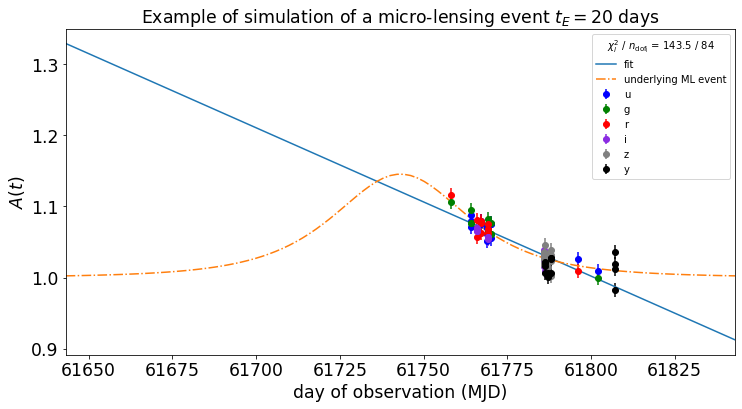

In [31]:
least_squares_line = LeastSquares(x, y, y_noise, linear) #linear least squares
m_line = Minuit(least_squares_line, alpha=1, beta=1)  

m_line.migrad() # finds minimum of least_squares function
m_line.hesse()  # accurately computes uncertainties

plt.errorbar(x_u, y_u, y_noise, fmt="o", label="u", color = "b")  #Show data points with their respective photometric error
plt.errorbar(x_g, y_g, y_noise, fmt="o", label="g", color = "g")  #Color depends on the filter
plt.errorbar(x_r, y_r, y_noise, fmt="o", label="r", color = "r")
plt.errorbar(x_i, y_i, y_noise, fmt="o", label="i", color = "blueviolet")
plt.errorbar(x_z, y_z, y_noise, fmt="o", label="z", color ="grey")
plt.errorbar(x_y, y_y, y_noise, fmt="o", label="y", color ="k")
plt.plot(ti, linear(ti, *m_line.values), label="fit")
plt.plot(ti,A(u(ti)),"-.",label="underlying ML event")


fit_info = [
    f"$\\chi^2_l$ / $n_\\mathrm{{dof_l}}$ = {m_line.fval:.1f} / {len(x) - m_line.nfit}",     #Display fit info
]
plt.xlabel("day of observation (MJD)")
plt.ylabel("$A(t)$")
plt.title("Example of simulation of a micro-lensing event $t_E = 20$ days")
plt.legend(title="\n".join(fit_info))
plt.xlim(tmin,tmax)

In [32]:
(m_line.fval - m.fval)/np.sqrt(2*(len(x)- m.nfit)) 

5.843451207952989

# Test error on magnitude

In [33]:

m = 20
xerr = []
sigma_sys = 0.003
error_photo = []


for i in range (len(df)) :
    
    xerr.append( 10**(0.4*(m - df["fiveSigmaDepth"][i])))
    
    if (df["filter"][i] == "u") :
        
        error_photo.append( np.sqrt(sigma_sys**2 + (0.04 - 0.037) * xerr[i] + 0.037 * xerr[i]**2))  
   
    elif (df["filter"][i] == "g") :
        
        error_photo.append( np.sqrt(sigma_sys**2 + (0.04 - 0.038) * xerr[i] + 0.038 * xerr[i]**2))  
        
    elif (df["filter"][i] == "r") :
        
        error_photo.append( np.sqrt(sigma_sys**2 + (0.04 - 0.039) * xerr[i] + 0.039 * xerr[i]**2))  
        
    elif (df["filter"][i] == "i") :
        
        error_photo.append( np.sqrt(sigma_sys**2 + (0.04 - 0.039) * xerr[i] + 0.039 * xerr[i]**2))      
           
    elif (df["filter"][i] == "z") :
        
        error_photo.append( np.sqrt(sigma_sys**2 + (0.04 - 0.040) * xerr[i] + 0.040 * xerr[i]**2))     
        
    elif (df["filter"][i] == "y") :
        
        error_photo.append( np.sqrt(sigma_sys**2 + (0.04 - 0.040) * xerr[i] + 0.040 * xerr[i]**2))
        


# Photo error as a function of magnitude

Text(0.5, 1.0, 'Photometric error as a function of magnitude')

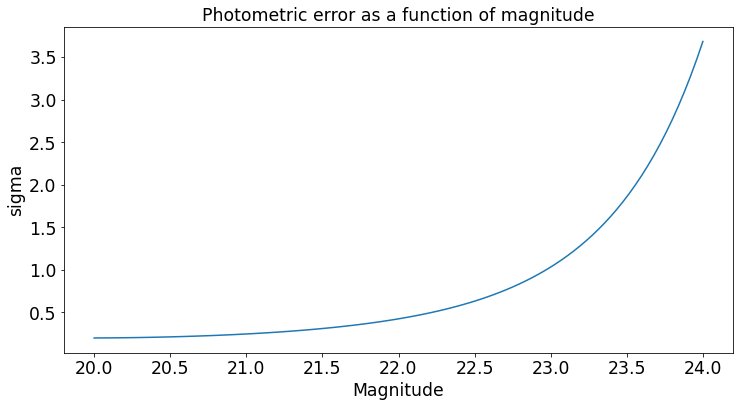

In [90]:
mag = np.linspace(20,24,100)
sigma = []

for i in range (len(mag)) :
    
    sigma.append(np.sqrt(sigma_sys**2 + (0.04 - 0.037) * 10**(0.4*(mag[i] - 20)) + 0.037 * 10**(0.4*(mag[i] - 20))**2))

    
plt.plot(mag,sigma)
plt.xlabel("Magnitude")
plt.ylabel("sigma")
plt.title("Photometric error as a function of magnitude")
#plt.text(x = 21, y = 3, s = "Low magnitude/Bright source means high photometric error", fontsize = 15, color = 'r')

# Background noise

$$
    F_b = F_{ab}10^{-0.4m_b} \times \pi \theta_{seeing}^2 
$$

$$
     F_{ab} = 3631 Jy = 3631\times10^{-23} erg.s^{-1}.Hz^{-1}.cm^{-2} = 3631\times10^{-26} W.Hz^{-1}.m^{-2}
$$

$$
    N_{pe}^b = \frac{\pi D^2 \Delta T}{4h}F_b \int_{}^{} T^{syst}_b(\lambda) \,\frac{d\lambda}{\lambda} 
$$

In [35]:
df_LSST = pd.read_csv("D:\\Projet de recherche\Stage\lsst_throughput.csv", index_col=0)

In [36]:
LSST_u = S.ArrayBandpass(df_LSST["wl"].values*10, df_LSST["u"].values, name = "u")
LSST_g = S.ArrayBandpass(df_LSST["wl"].values*10, df_LSST["g"].values, name = "g")
LSST_r = S.ArrayBandpass(df_LSST["wl"].values*10, df_LSST["r"].values, name = "r")
LSST_i = S.ArrayBandpass(df_LSST["wl"].values*10, df_LSST["i"].values, name = "i")
LSST_z = S.ArrayBandpass(df_LSST["wl"].values*10, df_LSST["z"].values, name = "z")
LSST_y = S.ArrayBandpass(df_LSST["wl"].values*10, df_LSST["y"].values, name = "y")

Wave = df_LSST["wl"]*10
Wavelength = np.array(Wave)

In [37]:
ObservationStartMJD_u = []
ObservationStartMJD_g = []
ObservationStartMJD_r = []
ObservationStartMJD_i = []
ObservationStartMJD_z = []
ObservationStartMJD_y = []

for i in range (len(df["observationId"])) :
    
    if (df['filter'][i] == 'u') :
            
            ObservationStartMJD_u.append(df["observationStartMJD"].values[i])
    
    if (df['filter'][i] == 'g') :
            
            ObservationStartMJD_g.append(df["observationStartMJD"].values[i])
            
    if (df['filter'][i] == 'r') :
            
            ObservationStartMJD_r.append(df["observationStartMJD"].values[i])
            
    if (df['filter'][i] == 'i') :
            
            ObservationStartMJD_i.append(df["observationStartMJD"].values[i])
            
    if (df['filter'][i] == 'z') :
            
            ObservationStartMJD_z.append(df["observationStartMJD"].values[i])
            
    if (df['filter'][i] == 'y') :
        
            ObservationStartMJD_y.append(df["observationStartMJD"].values[i])

In [38]:
from astropy import units as u

D = Deff
Delta_T = EXPOSURE
F_ab = 3631*10**(-23) * u.erg/u.s/u.Hz/u.cm**2

In [39]:
F_ab.to(u.jansky)

<Quantity 3631. Jy>

In [40]:
H = S.units.H * (u.erg * u.s)
H

<Quantity 6.6262e-27 erg s>

In [41]:
F_b = []
F_b_u = []
F_b_g = []
F_b_r = []
F_b_i = []
F_b_z = []
F_b_y = []

for i in range (len(df["observationId"])) :
    
    F_b.append(F_ab * pow(10,-0.4*df["skyBrightness"][i]) * np.pi * pow(df["seeingFwhmEff"][i],2))
    
    if (df['filter'][i] == 'u') :
            
            F_b_u.append(F_ab.value * pow(10,-0.4*df["skyBrightness"][i]) * np.pi * pow(df["seeingFwhmEff"][i],2))
    
    if (df['filter'][i] == 'g') :
            
            F_b_g.append(F_ab.value * pow(10,-0.4*df["skyBrightness"][i]) * np.pi * pow(df["seeingFwhmEff"][i],2))
            
    if (df['filter'][i] == 'r') :
            
            F_b_r.append(F_ab.value * pow(10,-0.4*df["skyBrightness"][i]) * np.pi * pow(df["seeingFwhmEff"][i],2))
            
    if (df['filter'][i] == 'i') :
            
            F_b_i.append(F_ab.value * pow(10,-0.4*df["skyBrightness"][i]) * np.pi * pow(df["seeingFwhmEff"][i],2))
            
    if (df['filter'][i] == 'z') :
            
            F_b_z.append(F_ab.value * pow(10,-0.4*df["skyBrightness"][i]) * np.pi * pow(df["seeingFwhmEff"][i],2))
            
    if (df['filter'][i] == 'y') :
        
            F_b_y.append(F_ab.value * pow(10,-0.4*df["skyBrightness"][i]) * np.pi * pow(df["seeingFwhmEff"][i],2))

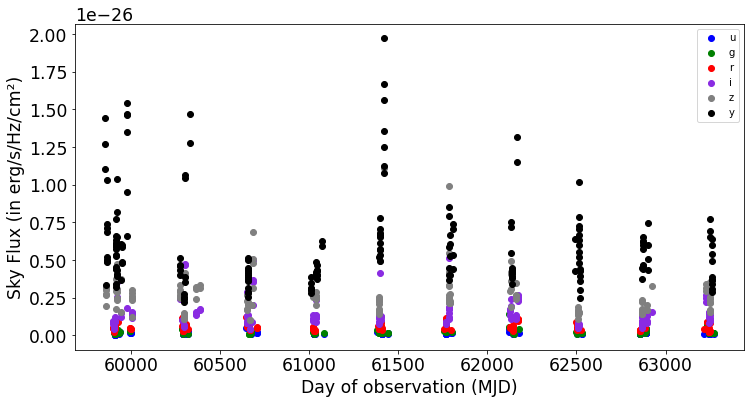

In [89]:
plt.scatter(ObservationStartMJD_u, F_b_u, color = 'b', label = 'u')
plt.scatter(ObservationStartMJD_g, F_b_g, color = 'g', label = 'g')
plt.scatter(ObservationStartMJD_r, F_b_r, color = 'r', label = 'r')
plt.scatter(ObservationStartMJD_i, F_b_i, color = 'blueviolet', label = 'i')
plt.scatter(ObservationStartMJD_z, F_b_z, color = 'grey', label = 'z')
plt.scatter(ObservationStartMJD_y, F_b_y, color = 'k', label = 'y')
plt.ylabel("Sky Flux (in erg/s/Hz/cm²)")
plt.xlabel("Day of observation (MJD)")
plt.legend()

In [85]:
N_pe = []
N_pe_u = []
N_pe_g = []
N_pe_r = []
N_pe_i = []
N_pe_z = []
N_pe_y = []

for i in range (len(F_b)) :
    
    if (df['filter'][i] == 'u') :
            
            N_pe.append(np.pi*D**2*Delta_T*F_b[i].value/(4*S.units.H)*integrate.trapz(LSST_u.throughput/Wavelength))
            N_pe_u.append(N_pe[i])
    
    if (df['filter'][i] == 'g') :
            
            N_pe.append(np.pi*D**2*Delta_T*F_b[i].value/(4*S.units.H)*integrate.trapz(LSST_g.throughput/Wavelength))
            N_pe_g.append(N_pe[i])
            
    if (df['filter'][i] == 'r') :
            
            N_pe.append(np.pi*D**2*Delta_T*F_b[i].value/(4*S.units.H)*integrate.trapz(LSST_r.throughput/Wavelength))
            N_pe_r.append(N_pe[i])
            
    if (df['filter'][i] == 'i') :
            
            N_pe.append(np.pi*D**2*Delta_T*F_b[i].value/(4*S.units.H)*integrate.trapz(LSST_i.throughput/Wavelength))
            N_pe_i.append(N_pe[i])
            
    if (df['filter'][i] == 'z') :
            
            N_pe.append(np.pi*D**2*Delta_T*F_b[i].value/(4*S.units.H)*integrate.trapz(LSST_z.throughput/Wavelength))
            N_pe_z.append(N_pe[i])
            
    if (df['filter'][i] == 'y') :
            
            N_pe.append(np.pi*D**2*Delta_T*F_b[i].value/(4*S.units.H)*integrate.trapz(LSST_y.throughput/Wavelength))
            N_pe_y.append(N_pe[i])


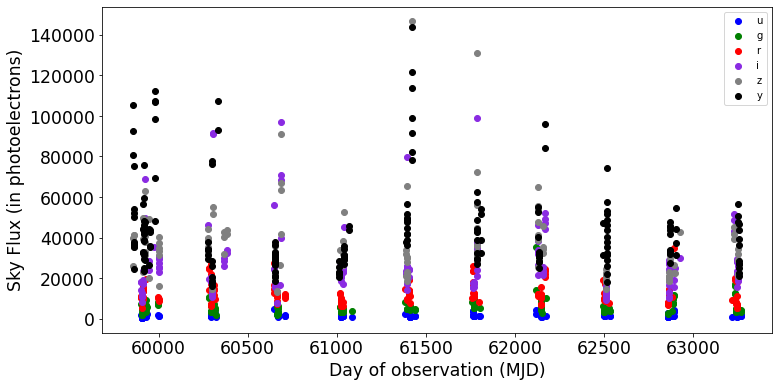

In [84]:
plt.scatter(ObservationStartMJD_u, N_pe_u, color = 'b', label = 'u')
plt.scatter(ObservationStartMJD_g, N_pe_g, color = 'g', label = 'g')
plt.scatter(ObservationStartMJD_r, N_pe_r, color = 'r', label = 'r')
plt.scatter(ObservationStartMJD_i, N_pe_i, color = 'blueviolet', label = 'i')
plt.scatter(ObservationStartMJD_z, N_pe_z, color = 'grey', label = 'z')
plt.scatter(ObservationStartMJD_y, N_pe_y, color = 'k', label = 'y')
plt.ylabel("Sky Flux (in photoelectrons)")
plt.xlabel("Day of observation (MJD)")
plt.legend()

In [45]:
#import scipy.integrate as integrate
#a = 0

#for i in range (len(LSST_u.throughput)) :
    
    #a = integrate.quad(lambda Wavelength: LSST_u.throughput[i]/Wavelength, 3000, 12000)
    
#a

In [46]:
integrate.trapz(LSST_u.throughput/Wavelength)

0.006519157490141833

In [47]:
a = 0

for i in range (len(LSST_u.throughput)) :
    
    a = a + LSST_u.throughput[i]/Wavelength[i]
    
a

0.006519276406808502

In [48]:
agk_81d266 = os.path.join(os.environ['PYSYN_CDBS'], 'calspec', 'agk_81d266_stisnic_007.fits')

agk_81d266_spec = S.FileSpectrum(agk_81d266).renorm(20, 'abmag', S.ObsBandpass('johnson,v'))

agk_81d266_spec.convert('count')

(0.0, 6000.0)

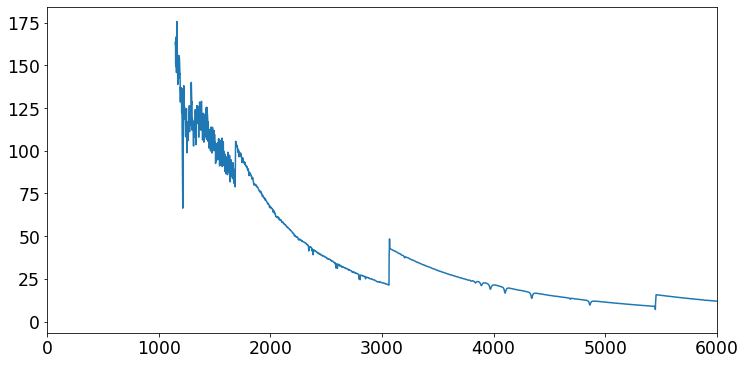

In [49]:
plt.plot(agk_81d266_spec.wave, agk_81d266_spec.flux)
plt.xlim([0,6000])

# Atmospheric throughput for every observation

In [50]:
import transmission as t

t.atmo(4959,1.2584)

0.86480181472

In [51]:
df_2018a = pd.read_csv(r'D:\Projet de recherche\Stage\Baseline_LMCv1_Atmosphere.csv')
df_2018a

,1,2,3,4,5,6,7,8,9,10,...,887,888,889,890,891,892,893,894,895,896
3000,0.009290,0.007645,0.006239,0.005402,0.009404,0.005323,0.007454,0.009175,0.007973,0.006507,...,0.005234,0.006587,0.008061,0.009584,0.005245,0.008040,0.005131,0.007894,0.008138,0.007270
3010,0.014854,0.012475,0.010382,0.009125,0.015018,0.009006,0.012198,0.014687,0.012949,0.010785,...,0.008873,0.010905,0.013077,0.015279,0.008890,0.013047,0.008718,0.012834,0.013187,0.011931
3020,0.021952,0.018749,0.015862,0.014115,0.022173,0.013950,0.018377,0.021728,0.019387,0.016422,...,0.013765,0.016589,0.019560,0.022525,0.013788,0.019519,0.013550,0.019233,0.019708,0.018014
3030,0.035094,0.030581,0.026392,0.023836,0.035406,0.023594,0.030057,0.034779,0.031481,0.027211,...,0.023323,0.027456,0.031724,0.035901,0.023357,0.031666,0.023009,0.031264,0.031933,0.029543
3040,0.041745,0.036646,0.031861,0.028932,0.042097,0.028655,0.036054,0.041389,0.037662,0.032800,...,0.028344,0.033080,0.037937,0.042657,0.028384,0.037872,0.027985,0.037417,0.038173,0.035471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11960,0.972714,0.971665,0.970460,0.969685,0.972787,0.969611,0.971543,0.972641,0.971874,0.970709,...,0.969529,0.970783,0.971931,0.972902,0.969539,0.971917,0.969434,0.971824,0.971979,0.971416
11970,0.972714,0.971665,0.970460,0.969685,0.972787,0.969611,0.971543,0.972641,0.971874,0.970709,...,0.969529,0.970783,0.971931,0.972902,0.969539,0.971917,0.969434,0.971824,0.971979,0.971416
11980,0.955584,0.953960,0.952106,0.950914,0.955696,0.950801,0.953771,0.955470,0.954283,0.952488,...,0.950675,0.952602,0.954371,0.955874,0.950691,0.954350,0.950529,0.954205,0.954446,0.953575
11990,0.955584,0.953960,0.952106,0.950914,0.955696,0.950801,0.953771,0.955470,0.954283,0.952488,...,0.950675,0.952602,0.954371,0.955874,0.950691,0.954350,0.950529,0.954205,0.954446,0.953575


In [52]:
bp_atmo = []

for i in range (len(df['observationId'])) :
    
    #if (df["observationStartMJD"].values[i] >= tmin) & (df["observationStartMJD"].values[i] <= tmax) :
        
    bp = S.ArrayBandpass(df_LSST["wl"].values*10, df_2018a.iloc[:,i].values, name = "Observation " + str(i+1))
    bp_atmo.append(bp)

In [53]:
all_bp = []
all_bp_u = []
all_bp_g = []
all_bp_r = []
all_bp_i = []
all_bp_z = []
all_bp_y = []

for i in range (len(bp_atmo)) :

    if (df['filter'][i] == 'u') :
        
        bp = LSST_u * bp_atmo[i]
        all_bp.append(bp)
        all_bp_u.append(bp)
        
    elif (df['filter'][i] == 'g') :
        
        bp = LSST_g * bp_atmo[i]
        all_bp.append(bp)
        all_bp_g.append(bp)
    
    elif (df['filter'][i] == 'r') :
        
        bp = LSST_r * bp_atmo[i]
        all_bp.append(bp)
        all_bp_r.append(bp)
    
    elif (df['filter'][i] == 'i') :
        
        bp = LSST_i * bp_atmo[i]
        all_bp.append(bp)
        all_bp_i.append(bp)
    
    elif (df['filter'][i] == 'z') :
        
        bp = LSST_z * bp_atmo[i]
        all_bp.append(bp)
        all_bp_z.append(bp)
    
    elif (df['filter'][i] == 'y') :
        
        bp = LSST_y * bp_atmo[i]
        all_bp.append(bp)
        all_bp_y.append(bp)

# Define the source spectrum below

In [54]:
Spec = S.Vega.renorm(20, 'abmag', S.ObsBandpass('johnson,v'))

In [55]:
all_obs = []

for bp in all_bp :
    
    obs = S.Observation(Spec, bp);
    all_obs.append(obs);

((y * Observation 1)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 2)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 3)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 4)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 5)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 6)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 7)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 8)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


((y * Observation 84)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 85)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 86)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 87)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 88)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 89)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 90)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 91)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

((r * Observation 171)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 172)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 173)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 174)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 175)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 176)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 177)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 178)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((i * Observation 254)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 255)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 256)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 257)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 258)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 259)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 260)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 261)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((i * Observation 342)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 343)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 344)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 345)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 346)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 347)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 348)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 349)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((r * Observation 432)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 433)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 434)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 435)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 436)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 437)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 438)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 439)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((u * Observation 523)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 524)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 525)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 526)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 527)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 528)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 529)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 530)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((g * Observation 612)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 613)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 614)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 615)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 616)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 617)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 618)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 619)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((i * Observation 700)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 701)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 702)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 703)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 704)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 705)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 706)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 707)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((u * Observation 791)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 792)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 793)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 794)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 795)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 796)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 797)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 798)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((y * Observation 883)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 884)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 885)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 886)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 887)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 888)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 889)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 890)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

In [56]:
all_obs_u = []
all_obs_g = []
all_obs_r = []
all_obs_i = []
all_obs_z = []
all_obs_y = []

for bp in all_bp_u :
    
    obs_u = S.Observation(Spec, bp);
    all_obs_u.append(obs_u);
    
for bp in all_bp_g :
    
    obs_g = S.Observation(Spec, bp);
    all_obs_g.append(obs_g);
    
for bp in all_bp_r :
    
    obs_r = S.Observation(Spec, bp);
    all_obs_r.append(obs_r);
    
for bp in all_bp_i :
    
    obs_i = S.Observation(Spec, bp);
    all_obs_i.append(obs_i);
    
for bp in all_bp_z :
    
    obs_z = S.Observation(Spec, bp);
    all_obs_z.append(obs_z);
    
for bp in all_bp_y :
    
    obs_y = S.Observation(Spec, bp);
    all_obs_y.append(obs_y);

((u * Observation 25)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 39)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 40)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 41)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 42)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 43)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 101)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 103)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used

((u * Observation 523)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 564)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 565)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 571)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 572)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 617)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 618)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((u * Observation 619)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((g * Observation 165)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 180)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 181)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 182)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 183)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 184)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 220)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 221)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((g * Observation 664)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 665)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 666)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 667)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 680)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 681)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 682)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((g * Observation 719)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((r * Observation 339)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 340)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 341)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 354)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 355)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 356)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 357)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((r * Observation 358)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((i * Observation 20)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 23)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 24)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 31)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 32)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 33)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 34)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 61)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

((i * Observation 535)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 536)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 537)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 538)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 539)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 549)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 575)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((i * Observation 576)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((z * Observation 155)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 156)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 192)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 193)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 194)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 199)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 200)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 201)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((z * Observation 698)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 701)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 702)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 751)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 752)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 757)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 758)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((z * Observation 763)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((y * Observation 209)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 210)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 211)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 232)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 233)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 264)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 265)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 266)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

((y * Observation 710)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 711)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 712)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 713)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 714)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 715)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 716)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((y * Observation 717)) does not have a defined binset in the wavecat table. The waveset of the spectrum will b

In [57]:
%%time

all_count = []
all_count_u = []
all_count_g = []
all_count_r = []
all_count_i = []
all_count_z = []
all_count_y = []
idx = 0

for obs in all_obs :
    
    all_count.append(obs.countrate()*EXPOSURE)
    
for obs_u in all_obs_u :
    
    all_count_u.append(obs_u.countrate()*EXPOSURE)
    idx += 1
    
print(idx)
idx = 0

for obs_g in all_obs_g :
    
    all_count_g.append(obs_g.countrate()*EXPOSURE)
    idx += 1
    
print(idx)
idx = 0
    
for obs_r in all_obs_r :
    
    all_count_r.append(obs_r.countrate()*EXPOSURE)
    idx += 1
    
print(idx)
idx = 0
    
for obs_i in all_obs_i :
    
    all_count_i.append(obs_i.countrate()*EXPOSURE)
    idx += 1
    
print(idx)
idx = 0
    
for obs_z in all_obs_z :
    
    all_count_z.append(obs_z.countrate()*EXPOSURE)
    idx += 1
    
print(idx)
idx = 0
    
for obs_y in all_obs_y :
    
    all_count_y.append(obs_y.countrate()*EXPOSURE)
    idx += 1
    
print(idx)

131
146
142
150
143
184
Wall time: 3min 2s


In [58]:
max(all_count_r)

63696.916653149914

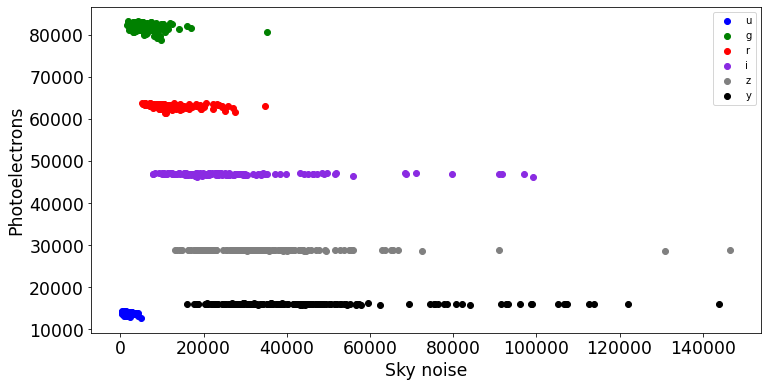

In [83]:
plt.scatter(N_pe_u, all_count_u, color = 'b', label = 'u')
plt.scatter(N_pe_g, all_count_g, color = 'g', label = 'g')
plt.scatter(N_pe_r, all_count_r, color = 'r', label = 'r')
plt.scatter(N_pe_i, all_count_i, color = 'blueviolet', label = 'i')
plt.scatter(N_pe_z, all_count_z, color = 'grey', label = 'z')
plt.scatter(N_pe_y, all_count_y, color = 'k', label = 'y')
plt.xlabel("Sky noise")
plt.ylabel("Photoelectrons")
plt.legend()

# Photometric error

$$
    N = \sqrt{N_{pe} + F}
$$

where 

$N_{pe}$ is the background noise 

F is the source flux  

N the photometric error

In [60]:
N = []
N_u = []
N_g = []
N_r = []
N_i = []
N_z = []
N_y = []

for i in range (len(bp_atmo)) :
    
    N.append(np.sqrt(N_pe[i] + all_count[i]))
    
for i in range (len(N_pe_u)) :
    
    N_u.append(np.sqrt(N_pe_u[i] + all_count_u[i]))
    
for i in range (len(N_pe_g)) :
    
    N_g.append(np.sqrt(N_pe_g[i] + all_count_g[i]))
    
for i in range (len(N_pe_r)) :
    
    N_r.append(np.sqrt(N_pe_r[i] + all_count_r[i]))
    
for i in range (len(N_pe_i)) :
    
    N_i.append(np.sqrt(N_pe_i[i] + all_count_i[i]))
    
for i in range (len(N_pe_z)) :
    
    N_z.append(np.sqrt(N_pe_z[i] + all_count_z[i]))
    
for i in range (len(N_pe_y)) :
    
    N_y.append(np.sqrt(N_pe_y[i] + all_count_y[i]))

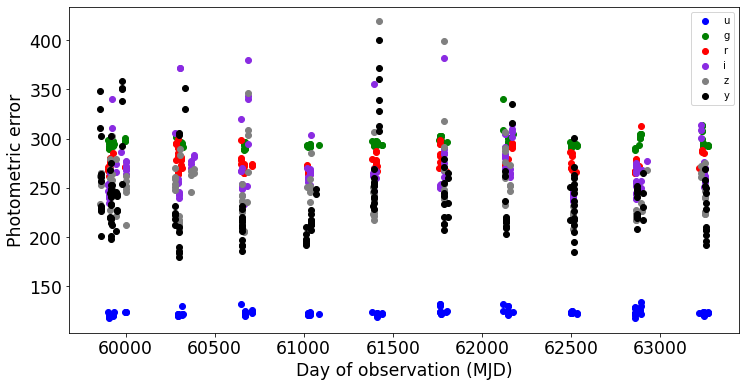

In [82]:
plt.scatter(ObservationStartMJD_u, N_u, color = 'b', label = 'u')
plt.scatter(ObservationStartMJD_g, N_g, color = 'g', label = 'g')
plt.scatter(ObservationStartMJD_r, N_r, color = 'r', label = 'r')
plt.scatter(ObservationStartMJD_i, N_i, color = 'blueviolet', label = 'i')
plt.scatter(ObservationStartMJD_z, N_z, color = 'grey', label = 'z')
plt.scatter(ObservationStartMJD_y, N_y, color = 'k', label = 'y')
plt.xlabel("Day of observation (MJD)")
plt.ylabel("Photometric error")
plt.legend()

Text(0.5, 1.0, 'Number of captured photoelectrons for observations in the u band (with photometric errors)')

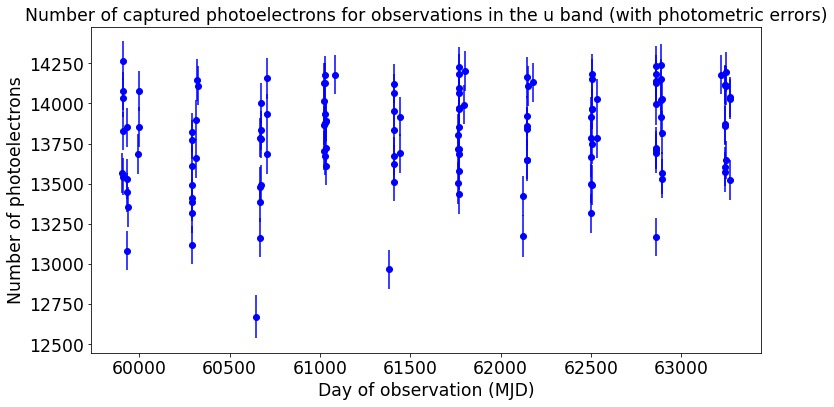

In [62]:
plt.errorbar(ObservationStartMJD_u, all_count_u, N_u, fmt="o", color = 'b')
plt.xlabel("Day of observation (MJD)")
plt.ylabel("Number of photoelectrons")
plt.title("Number of captured photoelectrons for observations in the u band (with photometric errors)")

Text(0.5, 1.0, 'Number of captured photoelectrons for observations in the g band (with photometric errors)')

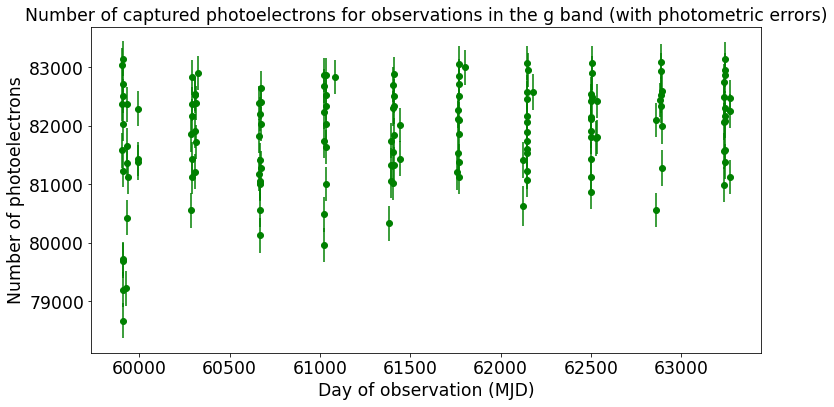

In [63]:
plt.errorbar(ObservationStartMJD_g, all_count_g, N_g, fmt="o", color = 'g')
plt.xlabel("Day of observation (MJD)")
plt.ylabel("Number of photoelectrons")
plt.title("Number of captured photoelectrons for observations in the g band (with photometric errors)")

Text(0.5, 1.0, 'Number of captured photoelectrons for observations in the r band (with photometric errors)')

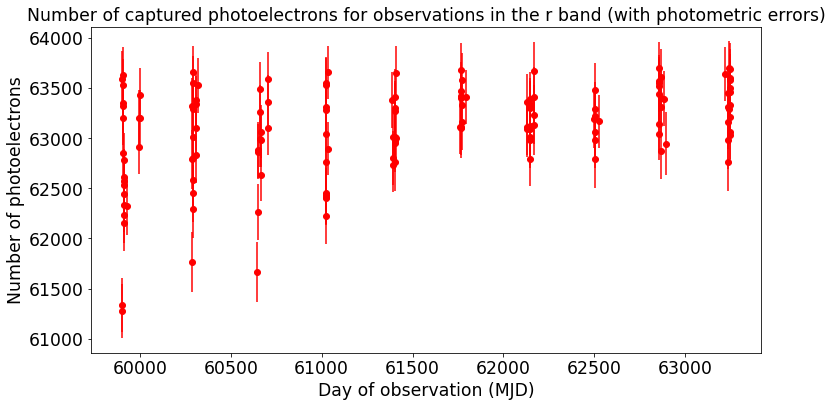

In [64]:
plt.errorbar(ObservationStartMJD_r, all_count_r, N_r, fmt="o", color = 'r')
plt.xlabel("Day of observation (MJD)")
plt.ylabel("Number of photoelectrons")
plt.title("Number of captured photoelectrons for observations in the r band (with photometric errors)")

Text(0.5, 1.0, 'Number of captured photoelectrons for observations in the i band (with photometric errors)')

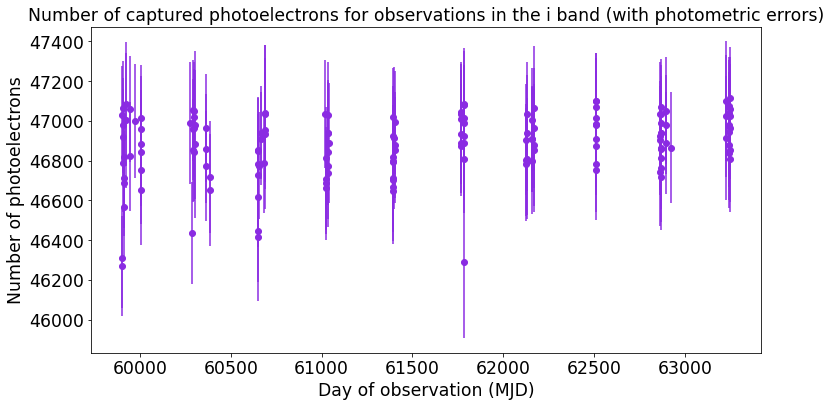

In [65]:
plt.errorbar(ObservationStartMJD_i, all_count_i, N_i, fmt="o", color = 'blueviolet')
plt.xlabel("Day of observation (MJD)")
plt.ylabel("Number of photoelectrons")
plt.title("Number of captured photoelectrons for observations in the i band (with photometric errors)")

Text(0.5, 1.0, 'Number of captured photoelectrons for observations in the z band (with photometric errors)')

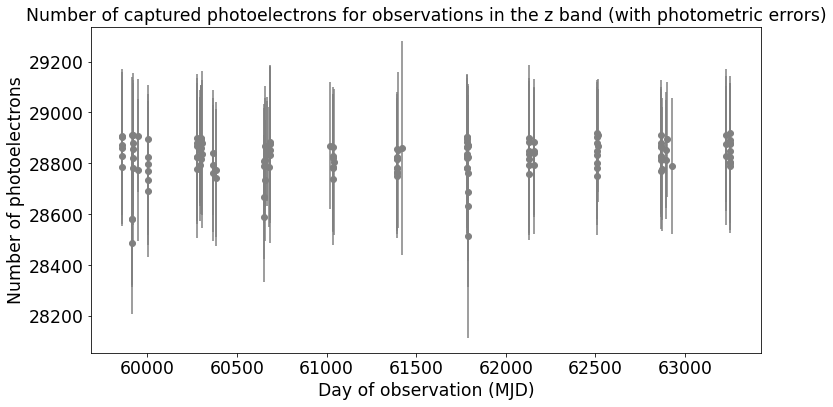

In [66]:
plt.errorbar(ObservationStartMJD_z, all_count_z, N_z, fmt="o", color = 'grey')
plt.xlabel("Day of observation (MJD)")
plt.ylabel("Number of photoelectrons")
plt.title("Number of captured photoelectrons for observations in the z band (with photometric errors)")

Text(0.5, 1.0, 'Number of captured photoelectrons for observations in the y band (with photometric errors)')

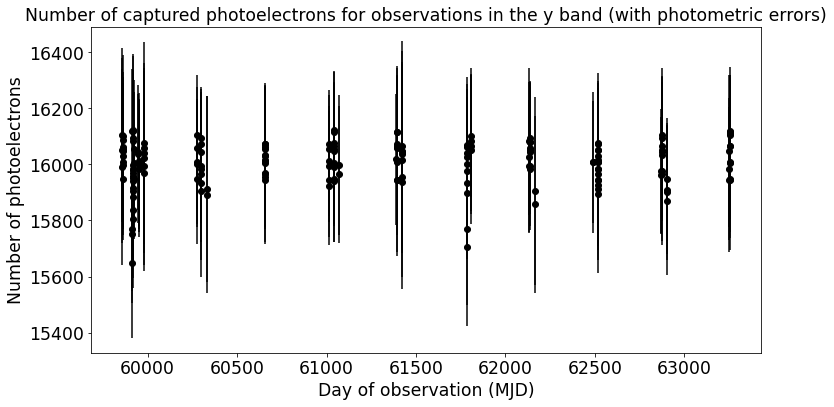

In [67]:
plt.errorbar(ObservationStartMJD_y, all_count_y, N_y, fmt="o", color = 'k')
plt.xlabel("Day of observation (MJD)")
plt.ylabel("Number of photoelectrons")
plt.title("Number of captured photoelectrons for observations in the y band (with photometric errors)")

# Amplitude error

$$
\sigma_A = \frac{\sigma_N \times A(t)}{F}
$$

In [68]:
def u(t):
    return np.sqrt(u0**2+ ((t-t0)/tE)**2)

In [69]:
def A(u):
    return (u**2+2)/u/np.sqrt(u**2+4)

In [77]:
amp_err = []
amp_err_u = []
amp_err_g = []
amp_err_r = []
amp_err_i = []
amp_err_z = []
amp_err_y = []

for i in range (len(all_count)) :
    
    amp_err.append(N[i] * A(u(df['observationStartMJD'][i]))/all_count[i])

for i in range (len(all_count_u)) :
        
    amp_err_u.append(N_u[i] * A(u(ObservationStartMJD_u[i]))/all_count_u[i])
        
for i in range (len(all_count_g)) :
        
    amp_err_g.append(N_g[i] * A(u(ObservationStartMJD_g[i]))/all_count_g[i])
    
for i in range (len(all_count_r)) :
        
    amp_err_r.append(N_r[i] * A(u(ObservationStartMJD_r[i]))/all_count_r[i])
    
for i in range (len(all_count_i)) :
        
    amp_err_i.append(N_i[i] * A(u(ObservationStartMJD_i[i]))/all_count_i[i])
    
for i in range (len(all_count_z)) :
        
    amp_err_z.append(N_z[i] * A(u(ObservationStartMJD_z[i]))/all_count_z[i])
    
for i in range (len(all_count_y)) :
        
    amp_err_y.append(N_y[i] * A(u(ObservationStartMJD_y[i]))/all_count_y[i])


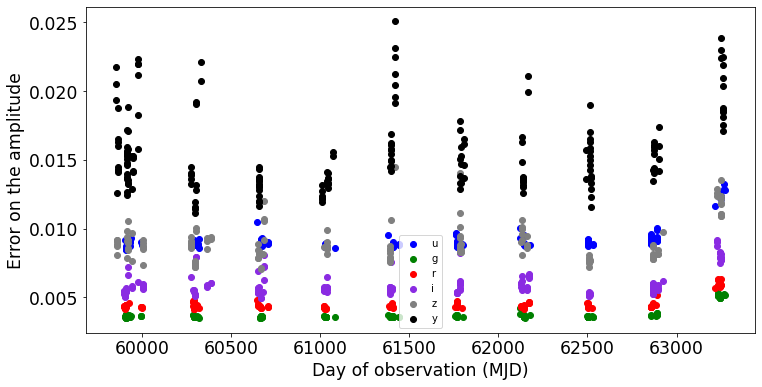

In [79]:
plt.scatter(ObservationStartMJD_u, amp_err_u, color = 'b', label = 'u')
plt.scatter(ObservationStartMJD_g, amp_err_g, color = 'g', label = 'g')
plt.scatter(ObservationStartMJD_r, amp_err_r, color = 'r', label = 'r')
plt.scatter(ObservationStartMJD_i, amp_err_i, color = 'blueviolet', label = 'i')
plt.scatter(ObservationStartMJD_z, amp_err_z, color = 'grey', label = 'z')
plt.scatter(ObservationStartMJD_y, amp_err_y, color = 'k', label = 'y')
plt.xlabel("Day of observation (MJD)")
plt.ylabel("Error on the amplitude")
plt.legend()

# Plotting the light curve and Microlensing fit with expected errors

t0 = 63335.58650922869
tE = 200
u0 = 0.8008720937330087


(62335.58650922869, 64335.58650922869)

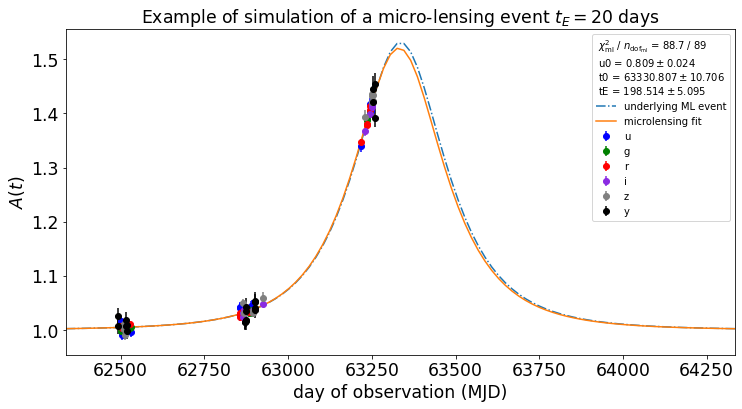

In [74]:
#Randomize parameters

from random import *

u0 = umin[randrange(len(umin))]
t0 = list_t0[randrange(len(list_t0))] 

#tE distribution or value

tE = 200

#Time t 

tmin=t0-5.*tE
tmax=t0+5.*tE
ti=np.linspace(tmin,tmax,100)


print("t0 = {}".format(t0)) #Display values
print("tE = {}".format(tE))
print("u0 = {}".format(u0))



#We distinguish data points by filter

df_event_u = df[(df["filter"] == "u") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax) & ((df['fieldRA'] - galaxy_ra)**2 + (df['fieldDec'] - galaxy_dec)**2 < Circle.radius.value**2)] 
df_event_g = df[(df["filter"] == "g") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax) & ((df['fieldRA'] - galaxy_ra)**2 + (df['fieldDec'] - galaxy_dec)**2 < Circle.radius.value**2)] 
df_event_r = df[(df["filter"] == "r") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax) & ((df['fieldRA'] - galaxy_ra)**2 + (df['fieldDec'] - galaxy_dec)**2 < Circle.radius.value**2)] 
df_event_i = df[(df["filter"] == "i") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax) & ((df['fieldRA'] - galaxy_ra)**2 + (df['fieldDec'] - galaxy_dec)**2 < Circle.radius.value**2)]  
df_event_z = df[(df["filter"] == "z") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax) & ((df['fieldRA'] - galaxy_ra)**2 + (df['fieldDec'] - galaxy_dec)**2 < Circle.radius.value**2)]  
df_event_y = df[(df["filter"] == "y") & (df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax) & ((df['fieldRA'] - galaxy_ra)**2 + (df['fieldDec'] - galaxy_dec)**2 < Circle.radius.value**2)] 
df_event = df[(df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax) & ((df['fieldRA'] - galaxy_ra)**2 + (df['fieldDec'] - galaxy_dec)**2 < Circle.radius.value**2)] 

df_event_times = df_event["observationStartMJD"].values
df_event_times_u = df_event_u["observationStartMJD"].values 
df_event_times_g = df_event_g["observationStartMJD"].values
df_event_times_r = df_event_r["observationStartMJD"].values
df_event_times_i = df_event_i["observationStartMJD"].values
df_event_times_z = df_event_z["observationStartMJD"].values
df_event_times_y = df_event_y["observationStartMJD"].values


#Photometric Error


    

amp_err = []
amp_err_u = []
amp_err_g = []
amp_err_r = []
amp_err_i = []
amp_err_z = []
amp_err_y = []

for i in range (len(df['observationStartMJD'])) :
    
    if (df["observationStartMJD"].values[i] >= tmin) & (df["observationStartMJD"].values[i] <= tmax) & ((df['fieldRA'][i] - galaxy_ra)**2 + (df['fieldDec'][i] - galaxy_dec)**2 < Circle.radius.value**2) :
        
        amp_err.append(N[i] * A(u(df['observationStartMJD'].values[i]))/all_count[i])
    
        if (df['filter'].values[i] == 'u') :
        
            
            amp_err_u.append(N[i] * A(u(df['observationStartMJD'].values[i]))/all_count[i])
       
        if (df['filter'].values[i] == 'g') :
        
            
            amp_err_g.append(N[i] * A(u(df['observationStartMJD'].values[i]))/all_count[i])
        
        if (df['filter'].values[i] == 'r') :
        
            
            amp_err_r.append(N[i] * A(u(df['observationStartMJD'].values[i]))/all_count[i])
        
        if (df['filter'].values[i] == 'i') :
        
            
            amp_err_i.append(N[i] * A(u(df['observationStartMJD'].values[i]))/all_count[i])
        
        if (df['filter'].values[i] == 'z') :
        
            
            amp_err_z.append(N[i] * A(u(df['observationStartMJD'].values[i]))/all_count[i])
        
        if (df['filter'].values[i] == 'y') :
        
            
            amp_err_y.append(N[i] * A(u(df['observationStartMJD'].values[i]))/all_count[i])
    



#Plot

plt.plot(ti,A(u(ti)),"-.",label="underlying ML event")
#plt.scatter(df_event_times,A(u(df_event_times)),marker="o",s=20,color = "b",label="u")
#plt.scatter(df_event_u_times,A(u(df_event_u_times)),marker="o",s=20,color = "b",label="u")
#plt.scatter(df_event_g_times,A(u(df_event_g_times)),marker="o",s=20,color = "g",label="g")
#plt.scatter(df_event_r_times,A(u(df_event_r_times)),marker="o",s=20,color = "r",label="r")
#plt.scatter(df_event_i_times,A(u(df_event_i_times)),marker="o",s=20,color ="blueviolet",label="i")
#plt.scatter(df_event_z_times,A(u(df_event_z_times)),marker="o",s=20,color ="grey",label="z")
#plt.scatter(df_event_y_times,A(u(df_event_y_times)),marker="o",s=20,color="k",label="y")

# Microlensing fit with iMinuit

x = df_event_times       
x_u = df_event_times_u
x_g = df_event_times_g
x_r = df_event_times_r
x_i = df_event_times_i
x_z = df_event_times_z
x_y = df_event_times_y

y_data = A(u(df_event_times))

y = y_data + amp_err * np.random.randn(len(x))
y_u = A(u(df_event_times_u)) + amp_err_u * np.random.randn(len(x_u))
y_g = A(u(df_event_times_g)) + amp_err_g * np.random.randn(len(x_g))
y_r = A(u(df_event_times_r)) + amp_err_r * np.random.randn(len(x_r))
y_i = A(u(df_event_times_i)) + amp_err_i * np.random.randn(len(x_i))
y_z = A(u(df_event_times_z)) + amp_err_z * np.random.randn(len(x_z))
y_y = A(u(df_event_times_y)) + amp_err_y * np.random.randn(len(x_y))


plt.errorbar(x_u, y_u, amp_err_u, fmt="o", label="u", color = "b")  #Show data points with their respective photometric error
plt.errorbar(x_g, y_g, amp_err_g, fmt="o", label="g", color = "g")  #Color depends on the filter
plt.errorbar(x_r, y_r, amp_err_r, fmt="o", label="r", color = "r")
plt.errorbar(x_i, y_i, amp_err_i, fmt="o", label="i", color = "blueviolet")
plt.errorbar(x_z, y_z, amp_err_z, fmt="o", label="z", color ="grey")
plt.errorbar(x_y, y_y, amp_err_y, fmt="o", label="y", color ="k")

least_squares = LeastSquares(x, y, amp_err, Ab)        # Fit using the least squares method
m = Minuit(least_squares, u0 = u0, t0 = t0, tE = tE)  #starting values for our parameters


m.migrad() # finds minimum of least_squares function
m.hesse()  # accurately computes uncertainties

plt.plot(ti, Ab(ti, *m.values), label="microlensing fit") 


#Plot legend etc

fit_info = [
    f"$\\chi^2_\\mathrm{{ml}}$ / $n_\\mathrm{{dof_\\mathrm{{ml}}}}$ = {m.fval:.1f} / {len(x) - m.nfit}",    #Display fit info  
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.xlabel("day of observation (MJD)")
plt.ylabel("$A(t)$")
plt.title("Example of simulation of a micro-lensing event $t_E = 20$ days")
plt.legend(title="\n".join(fit_info))
plt.xlim(tmin,tmax)

(62335.58650922869, 64335.58650922869)

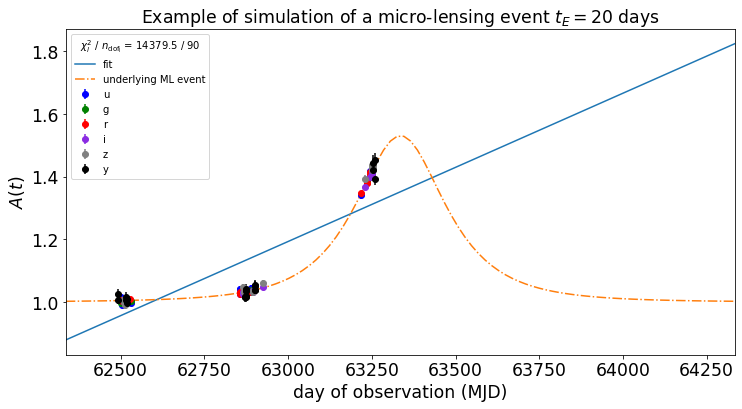

In [75]:
least_squares_line = LeastSquares(x, y, amp_err, linear) #linear least squares
m_line = Minuit(least_squares_line, alpha=1, beta=1)  

m_line.migrad() # finds minimum of least_squares function
m_line.hesse()  # accurately computes uncertainties

plt.errorbar(x_u, y_u, amp_err_u, fmt="o", label="u", color = "b")  #Show data points with their respective photometric error
plt.errorbar(x_g, y_g, amp_err_g, fmt="o", label="g", color = "g")  #Color depends on the filter
plt.errorbar(x_r, y_r, amp_err_r, fmt="o", label="r", color = "r")
plt.errorbar(x_i, y_i, amp_err_i, fmt="o", label="i", color = "blueviolet")
plt.errorbar(x_z, y_z, amp_err_z, fmt="o", label="z", color ="grey")
plt.errorbar(x_y, y_y, amp_err_y, fmt="o", label="y", color ="k")
plt.plot(ti, linear(ti, *m_line.values), label="fit")
plt.plot(ti,A(u(ti)),"-.",label="underlying ML event")


fit_info = [
    f"$\\chi^2_l$ / $n_\\mathrm{{dof_l}}$ = {m_line.fval:.1f} / {len(x) - m_line.nfit}",     #Display fit info
]
plt.xlabel("day of observation (MJD)")
plt.ylabel("$A(t)$")
plt.title("Example of simulation of a micro-lensing event $t_E = 20$ days")
plt.legend(title="\n".join(fit_info))
plt.xlim(tmin,tmax)

In [76]:
(m_line.fval - m.fval)/np.sqrt(2*(len(x)- m.nfit)) 

1071.135181756049